

## <font color = #99c9bd> **Análise Exploratória - Dados clientes Ifood**

<font color = #99c9bd>  **Objetivos da Análise:** 

<font color = #c6a9ac> **Temos aqui uma base de dados com informações dos clientes, queremos saber qual o perfil geral e também, de forma mais especifica, qual o perfil que gasta mais na plataforma. É interessante saber quem é esse cliente que gasta muito mas também quem gasta pouco, assim ficará mais fácil entender as oportunidades de atuação nesse público também. Vamos mergulhar nos dados e traçar esses perfis.**


<font color = #99c9bd> **Índice:**


<font color = #c6a9ac> **1. Características Gerais dos Dados**

<font color = #c6a9ac> **2. Análise Exploratória Aprofundada: Qual o perfil mais Frequente dos Clientes?**

<font color = #c6a9ac> **3.  Procurando Correlações**

<font color = #c6a9ac> **4. Qual o perfil dos clientes que gastam mais na plataforma e qual gasta menos?**





<font color = #99c9bd> **1. Características Gerais dos Dados**

In [305]:
# Importando bibliotecas

import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [ ]:
# baixando os dados

dados = pd.read_csv("/Users/thaisfernandespereira/Documents/estat_analises/descritiva/dados/mkt_data.csv")

In [220]:
# dando uma olhada nas colunas e primeiras linhas dos dados

dados.head(5)

,Unnamed: 0,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,marital_status,education_level,kids,expenses
0,0,58138.0,0,0,58,635,88,546,172,88,...,3.0,NaN,NaN,1529,1441,0,Single,Graduation,0,1529
1,1,46344.0,1,1,38,11,1,6,2,1,...,3.0,NaN,NaN,21,15,0,Single,Graduation,2,21
2,2,71613.0,0,0,26,426,49,127,111,21,...,3.0,NaN,NaN,734,692,0,Together,Graduation,0,734
3,3,26646.0,1,0,26,11,4,20,10,3,...,3.0,NaN,NaN,48,43,0,Together,Graduation,1,48
4,4,58293.0,1,0,94,173,43,118,46,27,...,NaN,NaN,5.0,407,392,0,Married,PhD,1,407


In [221]:
# dando uma olhada nas cateristicas baiscas das variáveis, tipo e quantidade de dados não nulos em cada coluna

dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 44 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            2205 non-null   int64  
 1   Income                2205 non-null   float64
 2   Kidhome               2205 non-null   int64  
 3   Teenhome              2205 non-null   int64  
 4   Recency               2205 non-null   int64  
 5   MntWines              2205 non-null   int64  
 6   MntFruits             2205 non-null   int64  
 7   MntMeatProducts       2205 non-null   int64  
 8   MntFishProducts       2205 non-null   int64  
 9   MntSweetProducts      2205 non-null   int64  
 10  MntGoldProds          2205 non-null   int64  
 11  NumDealsPurchases     2205 non-null   int64  
 12  NumWebPurchases       2205 non-null   int64  
 13  NumCatalogPurchases   2205 non-null   int64  
 14  NumStorePurchases     2205 non-null   int64  
 15  NumWebVisitsMonth    

<font color = #c6a9ac> Essa primeira olhada nos dados nos ajuda a entender as informaçǒes disponiveis para trabalhar, como elas estão organizadas, com base nisso podemos traçar algumas estratégias de análise, tendo em vista o objetivo final. 

Os dados interessantes para traçar um perfil dos clientes são: age, recency, marital_status, 'Kids', education_level, income e expenses,  NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth

Escolhemos esses dados pois eles possibilitam combinar uma análise do perfil demográfico juntamente com o padrão de relacionamento com a plataforma. Podemos determinar qual tem sido o padrão de relacionamento de um determinado perfil demográfico. 

A seguir vamos filtrar a base de dados pelas variáveis de interesse e conhecê-las um pouco melhor.

In [307]:
# filtrando as variáveis de interesse

dados_1 = dados.rename(columns={
    'Age': 'Idade',
    'kids': 'Filhos',
    'Recency': 'Dias sem Acessar',
    'marital_status' :'Estado Civil',
    'education_level' : 'Nivel Educacional',
    'expenses': 'Gastos na Plataforma',
    'NumDealsPurchases': 'Compras na Promoção',
    'NumWebVisitsMonth': 'Visitas ao Site por mês'
})

variaveis_interesse = [
   'Idade',
    'Filhos',
    'Dias sem Acessar',
    'Estado Civil',
    'Nivel Educacional',
    'Gastos na Plataforma',
    'Compras na Promoção',
    'Visitas ao Site por mês',
    'Income'
]

dados_1 = dados_1[variaveis_interesse]

# verificando quantidade de nulos nas variáveis de interesse

dados_1.isnull().sum()

Idade                      0
Filhos                     0
Dias sem Acessar           0
Estado Civil               0
Nivel Educacional          0
Gastos na Plataforma       0
Compras na Promoção        0
Visitas ao Site por mês    0
Income                     0
dtype: int64

In [308]:
# Verificando se há linhas duplicadas

qtd_duplicadas = dados_1.duplicated().sum()

print(f"Número de linhas duplicadas: {qtd_duplicadas}")

Número de linhas duplicadas: 203


In [309]:
# Verificando se há linhas duplicadas

dados_1 = dados_1.drop_duplicates()

In [310]:
# Ajustando os dados de renda para o formato mensal

dados_1['Renda Mensal'] = dados_1['Income'] / 12

# Excluindo as linhas duplicadas: 

dados_2 = dados_1.drop('Income', axis=1)

In [311]:
dados_2.describe(include='all').round()

,Idade,Filhos,Dias sem Acessar,Estado Civil,Nivel Educacional,Gastos na Plataforma,Compras na Promoção,Visitas ao Site por mês,Renda Mensal
count,2002.0,2002.0,2002.0,2002,2002,2002.0,2002.0,2002.0,2002.0
unique,NaN,NaN,NaN,5,5,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Married,Graduation,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,778,1010,NaN,NaN,NaN,NaN
mean,51.0,1.0,49.0,NaN,NaN,564.0,2.0,5.0,4307.0
std,12.0,1.0,29.0,NaN,NaN,576.0,2.0,2.0,1727.0
min,24.0,0.0,0.0,NaN,NaN,4.0,0.0,0.0,144.0
25%,43.0,0.0,24.0,NaN,NaN,55.0,1.0,3.0,2952.0
50%,50.0,1.0,49.0,NaN,NaN,343.0,2.0,6.0,4287.0
75%,61.0,1.0,74.0,NaN,NaN,962.0,3.0,7.0,5692.0


<font color = #c6a9ac> Até aqui vimos que as variáveis de interesse não possuem valores nulos, mas encontramos 203 linhas duplicadas que resolvemos excluir para não atrapalhar a análise. 

Abaixo rodamos um describe, para obter informações gerais e rápidas dos dados numéricos. Aqui podemos tomar notas de algumas informações importantes: 

1. **Idade:** A média dos clientes da base variam bastante, 24 a 80 anos. Mas a média é 51 e a mediana é 50 o que demonstra que a distribuição é relativamente simétrica em torno dessa faixa, considerando o desvio padrão os usuários dessa amostra estão entre 39 a 63 anos, isso sugere que público predominante entre meia-idade e o começo da terceira idade com poucos usuários muito velhos ou muito jovens. A média sendo um pouco mais alta que a mediana, mesmo que pouco, pode indicar cauda da distribuição mais longa para à direita em direção à idades mais altas

2. **Filhos:** Em média os clientes tem 1 filho  no mínimo nenhum e no máximo 3, até 75% tem no máximo um filho, ou seja, poucos clientes com mais de 1 filho

3. **Útima compra**: Há desde compradores muito recentes até pessoas inativas por mais de 3 meses, a mêdia e mediana sendo 49 e o desvio padrão em 29 dias indica a alta variabilidade e muitos perfis de compra, podendo ser classificados como usuários recentes, médios e inativos 

4. **Renda:** Em média os clientes tem renda de 4.300 reais podendo chegar a 9 mil, com alta dispersão, dado o desvio padrão indicado. Essa amostra possivelmente tem outliers de baixa renda, todavia a média é maior que a mediana o que pode indicar assimetria à direita, em direção a valores mais altos

5. **Gastos na Plataforma**: A mediana é consideravelmente menor que a média o que indica assimetria à direita, ou seja, poucos usuários gastam muito elevando a média. O desvio padrão é muito alto, o que indica possíveis outliers com valores altos impactando a média. Metade dos usuários gastam até 343 reais, e 75% deles até 964 reais, a maioria gasta pouco. 

6. **Compras na promoção:** A maioria dos clientes fez entre 1 e 3 compras em promoção, a diferença entre o terceiro quartil e 0 máximo indicam presença de outliers, existem poucos clientes que compram muito, mas poucos a ponto de não influenciar tanto a média que é a mesma que mediana. 

7. E para os demais, que mostram onde o cliente faz mais compras, se na web, no catalogo ou diretamente nas lojas, em média parece que diretamente na loja é uma preferência

8. **Visitas ao Site:** A maioria dos usuários visitou o site entre 3 e 7 vezes, a mediana sendo maior que a média indica que alguns numeros muitos baixos puxam a média para baixo, porém a dispersão dessa distribuição é relativamente pequena, existindo possivelmente alguns poucos clientes altamente engajados dado o máximo tão distante da média. 

Essa análise é boa para nos dizer aspectos gerais dos clientes, agora sabemos que parece um perfil mais velho, que gosta de comprar diretamente na loja, que tem uma renda abaixo de 5 mil reais, que demora para acessar a plataforma, não visita muito o site nem compra muito em promoções e prefere comprar diretamente nas lojas. Na próxima seção vamos aprofundar essa análise para tirar dúvidas e ajudar na etapa de seguimentação, onde iremos dizer o comportamento de cada tipo de cliente. Aqui ainda não analisamos nível educacional nem estado civil, essas variáveis junto com a renda e idade nos ajudarão a seguimentar melhor os perfis dos clientes e descobrir como cada perfil se relaciona com a plataforma. 

<font color = #99c9bd> **2. Análise Exploratória Aprofundada: Qual o perfil mais Frequente dos Clientes?**

<font color = #c6a9ac> **Análise por tipo de variável**

<font color = #c6a9ac> **2.1 Variáveis Numéricas**

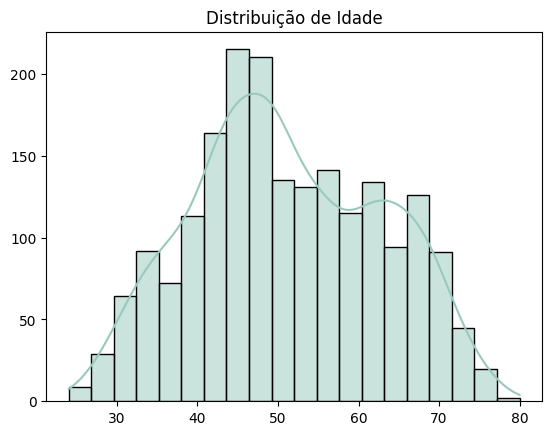

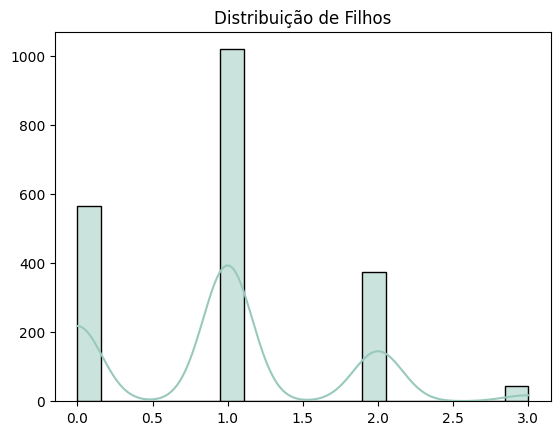

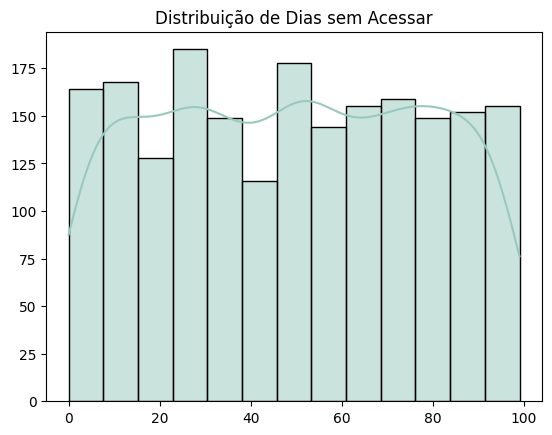

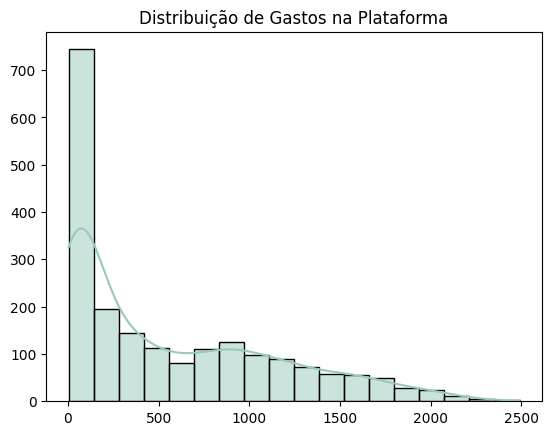

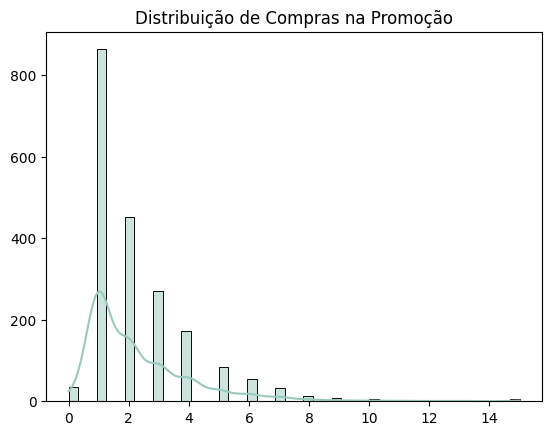

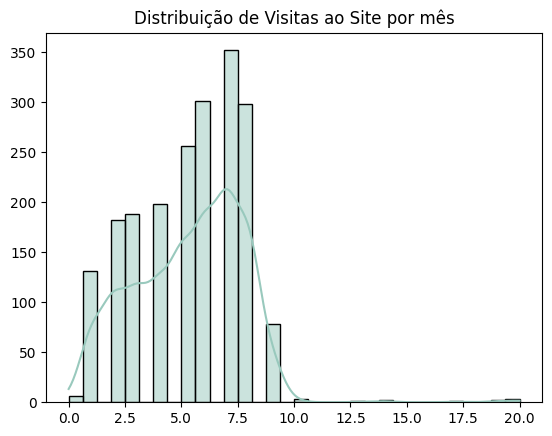

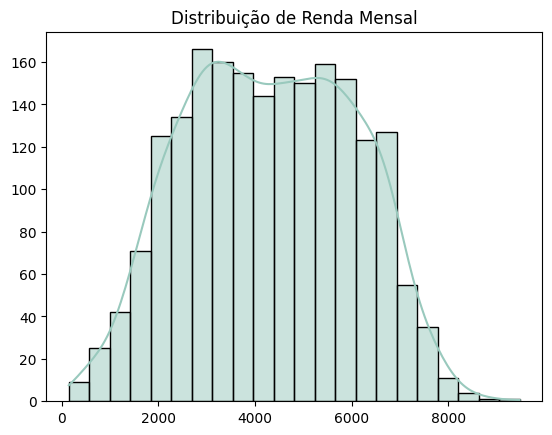

In [246]:
numeric_vars = dados_2.select_dtypes(include='number').columns

# Histogramas + KDE
for var in numeric_vars:
    plt.figure()
    sn.histplot(dados_1[var], kde=True, color= '#99c9bd')
    plt.title(f"Distribuição de {var}")
    plt.ylabel('')
    plt.xlabel('')
    plt.show()

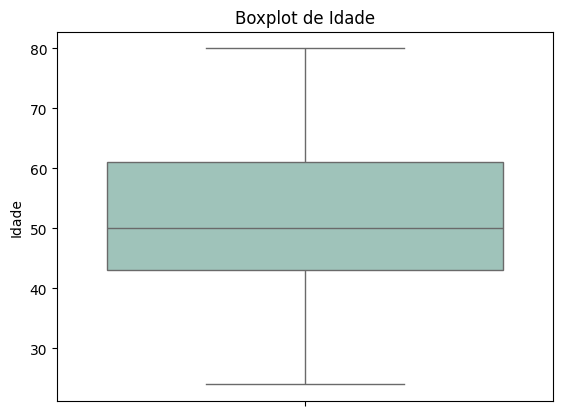

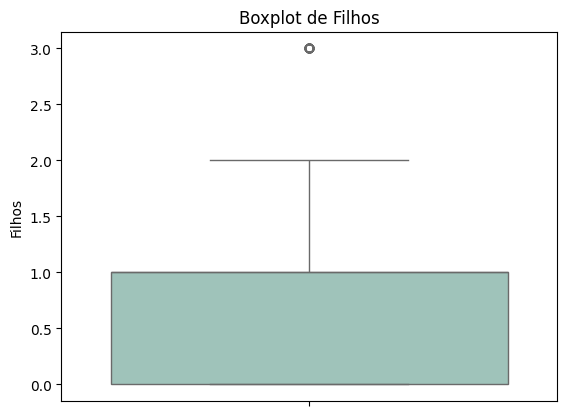

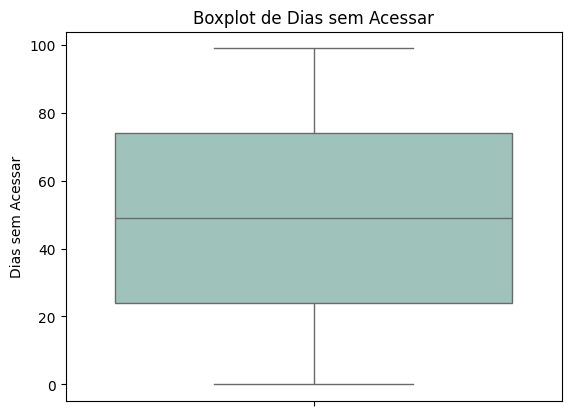

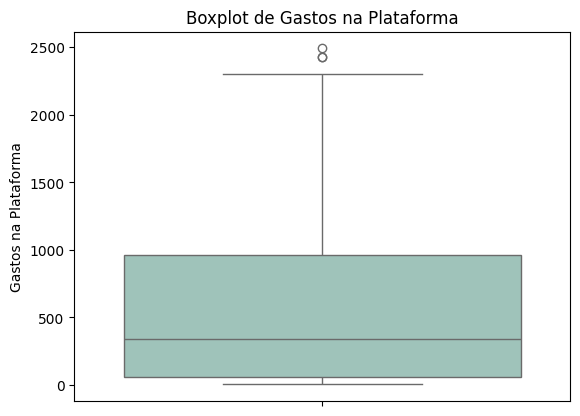

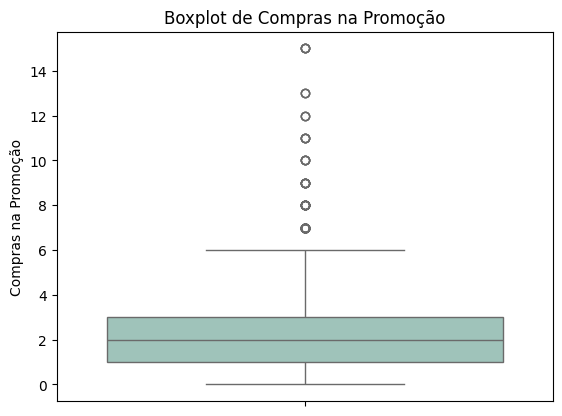

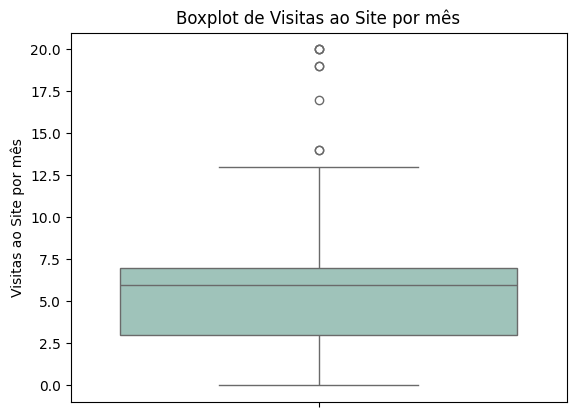

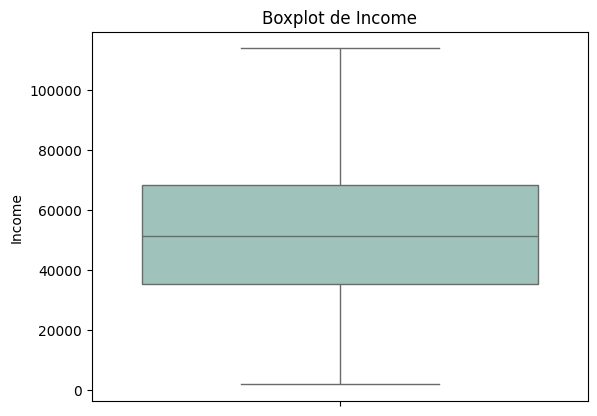

In [207]:
# Boxplots (para detectar outliers)
for var in numeric_vars:
    plt.figure()
    sn.boxplot(y=dados_2[var], color= '#99c9bd')
    plt.title(f"Boxplot de {var}")
    plt.show()

<font color = #c6a9ac> Nessa seção tentamos entender mais profundamente o perfil dos clientes da base de dados olhando as distribuições. Levando em conta os dados gerais levantados anteriormente, vamos aos insights que essa análise mais detalhada possibilitou: 

1. **Idade**: Tinhamos uma ideia de que a idade variava bastante (de 24 a 80 anos). Com o histograma e o bloxplot está evidente que o publico da plataforma está bem concentrado entre as faixas 40 - 50 anos, antes dos 40 e depois dos 70 é escasso o numero de clientes. Sendo que próximo dos 50 existem alguns picos de quantidade de clientes. Para analisar a relacao do consumo na plataforma e a idade do cliente podemos criar faixas de "Até 40 anos", "De 41 a 60" e "De 61 a 80"

2. **Filhos**: A quantidade de filhos ou crianças em casa é uma variável que pode ser analisada como categórica, por isso olhamos o boxplot mas também a frequência relativa. Na primeira análise mais geral sabíamos que a quantidade variava entre 0 e 3, No boxplot vimos que 3 filhos são outliers, 2 é o limite superior e a maioria dos clientes tem ou nenhum ou apenas 1. Na tabela de frequência isso fica ainda mais claro: 50% dos clientes tem 1 filho, 28% nenhum e 18% tem 2 filhos.

3. **Última compra:** Na primeira análise geral vimos que havia uma grande variabilidade no tempo desde a última compra, no histograma vimos que tanto a quantidade de clientes sem nenhum dia sem comprar é bem parecida com a quantidade que esta há mais de dois meses, no boxplot no entanto esse dado ficou um pouco mais claro: a maioria dos clientes tem entre 20 e 80 dias sem acessar, sendo que os valores próximos de zero e próximos de cem são mais escassos, posicionados no limite superior e inferior, não há outliers, de fato, há perfis variados de clientes.

4. **Renda**: A renda varia mas não tanto quanto os dias sem comprar, nao temos outliers nesse dado e uma distribuição praticamente concentrada na faixa de 2 mil a 6 mil. 

5. **Gastos na Plataforma**: Como havíamos previsto na análise geral, há outliers nessa distribuição possivelmente puxando o valor da média para cima, a maioria das pessoas gasta no máximo 1000k, e a maioria até 300 reais, como já indicava a mediana. 

6. **Compras na Promoção**: Do mesmo modo que gastos na plataforma há outliers nesse dado, todaria é bem claro pela distribuição e boxplot que a maioria fez apenas 2 compras na promoção, variando 2 pra cima e 2 pra baixo, como ja indicava o desvio padrão. 

7. **Visitas ao site por mês**: Os outliers mostram que há alguns pouquíssimos clientes muito engajados, a maioria acessa o site 5 ou 6 vezes como jâ demonstrava a média, mediana e desvio padrão. 

<font color = #c6a9ac> **2.2. Variáveis Categóricas**

In [253]:
# Valores distintos da formaçao academica

dados_2['Nivel Educacional'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [252]:
# Qual é o nivel educacional dos clientes? 

contagem = dados_2['Nivel Educacional'].value_counts()

percentual = dados_2['Nivel Educacional'].value_counts(normalize=True)* 100

pd.DataFrame({
    'Quantidade': contagem,
    'Percentual (%)': percentual.round(1)

})

,Quantidade,Percentual (%)
Nivel Educacional,,
Graduation,1010,50.4
PhD,431,21.5
Master,331,16.5
2n Cycle,181,9.0
Basic,49,2.4


In [249]:
# Valores distintos do estado civil

dados_2['Estado Civil'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow'], dtype=object)

In [250]:
# Qual é o estado civil dos clientes? 

contagem = dados_2['Estado Civil'].value_counts()

percentual = dados_2['Estado Civil'].value_counts(normalize=True)* 100

pd.DataFrame({
    'Quantidade': contagem,
    'Percentual (%)': percentual.round(1)

})

,Quantidade,Percentual (%)
Estado Civil,,
Married,778,38.9
Together,505,25.2
Single,439,21.9
Divorced,211,10.5
Widow,69,3.4


In [276]:
# Qual é o estado civil dos clientes? 

contagem = dados_2['Filhos'].value_counts()

percentual = dados_2['Filhos'].value_counts(normalize=True)* 100

pd.DataFrame({
    'Quantidade': contagem,
    'Percentual (%)': percentual.round(1)

})

,Quantidade,Percentual (%)
Filhos,,
1,1018,50.8
0,564,28.2
2,375,18.7
3,45,2.2


<font color = #c6a9ac> 

Sobre as variáveis categóricas temos alguns insights: 

1. **Nível Educacional**: A plataforma tem um perfil bem claro de clientes com ensino superior, mais de 80% da base. 
2. **Estado Civil**: Mais de 50% dos clientes tem conjuge, sendo casado oficialmente ou morando juntos
3. **Filhos**: Metade dos clientes tem 1 filho. 

**A partir dessas análises, usando estatística descritiva, histogramas, boxplot e tabelas de frequência podemos inferir alguns aspectos do perfil mais frequente dos clientes dessa amostra:**

<font color = #d45e80> **"São clientes na faixa dos 40-50 anos, com ensino superior e renda entre 3 e 6 mil reais mensais, casados e com 1 filho em casa. Gastam na plataforma até 300 reais e entram no site 5 ou 6 vezes por mês."**

<font color = #99c9bd> **3. Procurando Correlações**

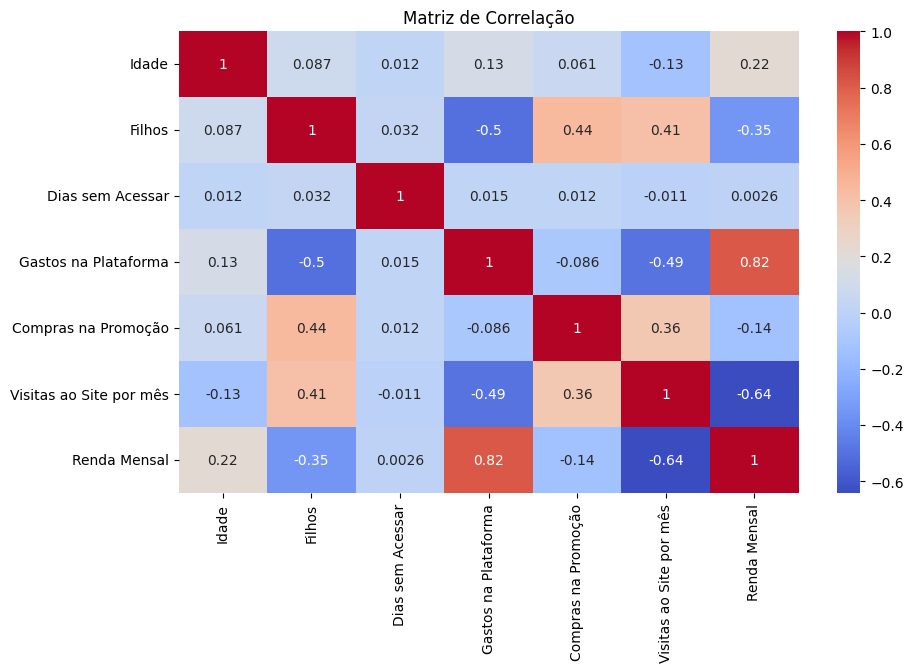

In [247]:
# Correlação entre variáveis numéricas
plt.figure(figsize=(10, 6))
sn.heatmap(dados_2[numeric_vars].corr(), annot=True, cmap='coolwarm')
plt.title("Matriz de Correlação")
plt.show()


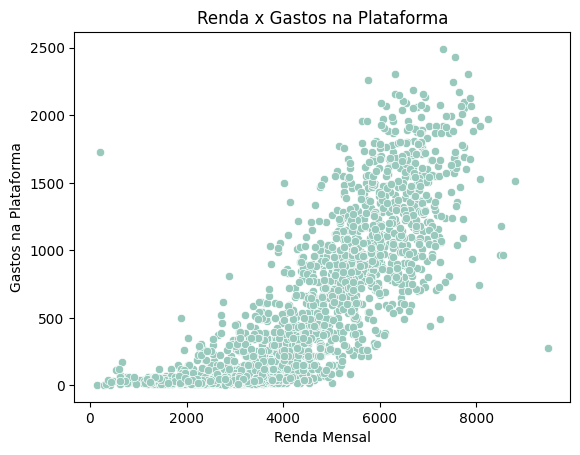

In [296]:
# Exemplo: relação entre idade e gasto total
sn.scatterplot(data=dados_2, x='Renda Mensal', y='Gastos na Plataforma', color= '#99c9bd')
plt.title("Renda x Gastos na Plataforma")
plt.show()

<font color = #c6a9ac> **Para essa análise pegamos todas as variáveis categóricas para entender se há correlação entre algumas delas. A partir do diagrama de correlação percebemos que as únicas variáveis que possuem uma relação forte são 'Renda' e 'Gastos na Plataforma', para averiguar melhor essa relaçǎo fizemos o gráfico com as duas variáveis, e de fato parece que quanto maior a renda do cliente maior seu gasto na plataforma, o que é bem intuitivo.**

<font color = #99c9bd> **4. Qual o perfil dos clientes que gastam mais na plataforma e qual gasta menos?**

<font color = #c6a9ac> **Nessa seção vamos transformar os dados em categorias para que fique mais claro a relação dessas categorias, ou perfis de clientes, com o gasto na plataforma. Para isso vamos criar as seguintes categorias:**

<font color = #5c627a> **1. Engajamento no site:** 'Inativo' (Nenhuma visita no último mês), 'Pouco Engajado' (De 1 a 3 visitas no último mês), 'Médio' (De 4 a 7 visitas), 'Frequente' (Mais que 7 visitas)


<font color = #5c627a> **2. Estado Civil:** 'Solteiro' (incluindo a categoria 'viuvo' e 'divorciado') e 'Casado' (incluindo a categoria 'together')


<font color = #5c627a> **3. Filhos pequenos em casa:** 'Não tem filhos' e 'Tem Filhos' (1, 2, 3 ou mais filhos)

<font color = #5c627a> **4. Faixa Salarial:** 'Salário Baixo' e 'Salário Alto', para essa categoria usamos o quartil 75, estando abaixo de aproximadamente 5.600 entra na primeira categoria estando acima entra na segunda


<font color = #5c627a> **5. Nível Educacional:** 'Nível Superior', 'Pós graduação' e 'Nivel Básico/Medio

<font color = #5c627a> **6. Faixa Etária:** 'Atê 30 anos', 'Entre 30 e 40', Entre 40 e 60', e 'Acima de 60'

<font color = #5c627a> **7. Dias sem Acessar:** 'Ativo' (utilizou a plataforma nos ultimos 7 dias), 'Pouco Frequente' (Ultilizou a plataforma entre 8 e 30 dias) e 'Quase Inativo' (não utiliza a plataforma faz mais de 1 mês)

<font color = #c6a9ac> **Ao final esperamos encontrar o perfil que gasta mais e o perfil que gasta menos ao cruzar essas categorias com os gastos na plataforma.**





/var/folders/x8/b89wn3vx0jd4cmv6h5_4cv6m0000gn/T/ipykernel_83269/2341020630.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.boxplot(x = 'engajamento', y = 'Gastos na Plataforma', data = dados_2, linewidth=1, palette = colors)


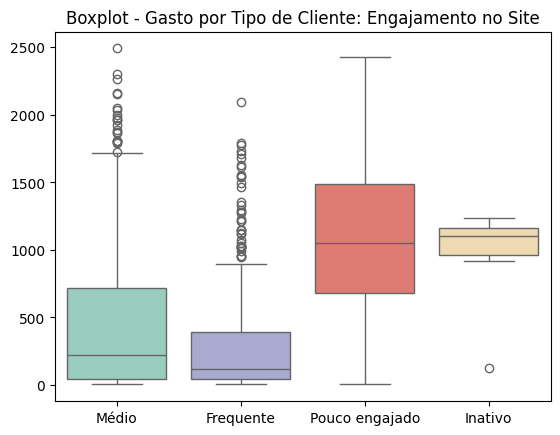

In [359]:
# Pessoas mais engajados no site gastam mais? 

def engajamento(visitas):
    if visitas == 0:
        return 'Inativo'
    elif 1 <= visitas <= 3:
        return 'Pouco engajado'
    elif 4 <= visitas <= 7:
        return 'Médio'
    else:
        return 'Frequente'

dados_2['engajamento'] = dados_2['Visitas ao Site por mês'].apply(engajamento)

colors = "#92d5c4", "#a1a4d7", "#f06d61", "#f7dea8"

sn.boxplot(x = 'engajamento', y = 'Gastos na Plataforma', data = dados_2, linewidth=1, palette = colors)
plt.ylabel('')
plt.xlabel('')
plt.title('Boxplot - Gasto por Tipo de Cliente: Engajamento no Site')

plt.show()


In [368]:
# tipo de engajamento de acesso

dados_2.groupby('engajamento')['Gastos na Plataforma'].agg(media= 'mean', mediana='median', desvio_padrao='std' ).round(2)

,media,mediana,desvio_padrao
engajamento,,,
Frequente,302.99,117.5,403.64
Inativo,945.00,1105.0,415.86
Médio,433.09,219.0,495.11
Pouco engajado,1049.00,1053.0,573.81


/var/folders/x8/b89wn3vx0jd4cmv6h5_4cv6m0000gn/T/ipykernel_83269/700824200.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.boxplot(x = 'estado_civil', y = 'Gastos na Plataforma', data = dados_2, linewidth=1, palette = colors)


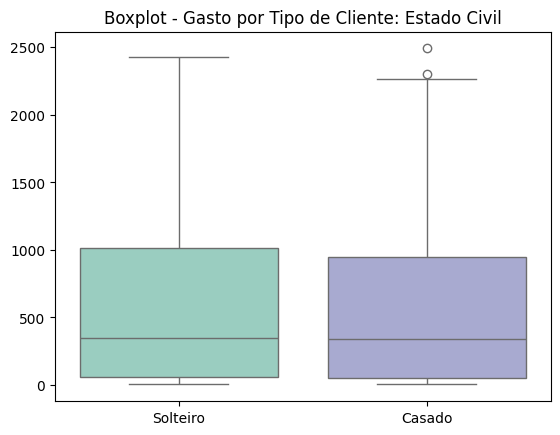

In [317]:
# Quem gasta mais casados ou solteiros? 

def estado_civil(marital_status):
    if marital_status in ['Divorced', 'Single', 'Widow']:
        return 'Solteiro'
    elif marital_status == 'Married':
        return 'Casado'
    else:
        return 'Casado'

dados_2['estado_civil'] = dados_2['Estado Civil'].apply(estado_civil)


colors = "#92d5c4", "#a1a4d7"

sn.boxplot(x = 'estado_civil', y = 'Gastos na Plataforma', data = dados_2, linewidth=1, palette = colors)
plt.ylabel('')
plt.xlabel('')
plt.title('Boxplot - Gasto por Tipo de Cliente: Estado Civil')

plt.show()

In [369]:
# estado civil e gastos

dados_2.groupby('estado_civil')['Gastos na Plataforma'].agg(media= 'mean', mediana='median', desvio_padrao='std' ).round(2)

,media,mediana,desvio_padrao
estado_civil,,,
Casado,555.21,341.0,571.88
Solteiro,578.41,348.0,583.26


/var/folders/x8/b89wn3vx0jd4cmv6h5_4cv6m0000gn/T/ipykernel_83269/2046983362.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.boxplot(x = 'tem_filhos', y = 'Gastos na Plataforma', data = dados_2, linewidth=1, palette = colors)


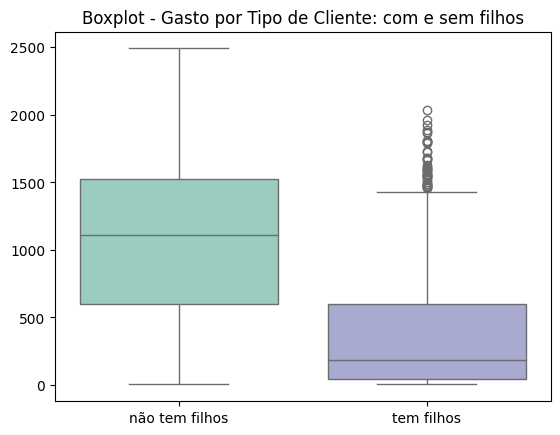

In [323]:
# As pessoas gastam mais ou menos em nossa plataforma quando têm filhos?

dados_2['tem_filhos'] = np.where(dados_2['Filhos'] == 0, 'não tem filhos', 'tem filhos')

colors = "#92d5c4", "#a1a4d7"

sn.boxplot(x = 'tem_filhos', y = 'Gastos na Plataforma', data = dados_2, linewidth=1, palette = colors)
plt.ylabel('')
plt.xlabel('')
plt.title('Boxplot - Gasto por Tipo de Cliente: com e sem filhos')

plt.show()

In [372]:
# Filhos e gastos

dados_2.groupby('tem_filhos')['Gastos na Plataforma'].agg(media= 'mean', mediana='median', desvio_padrao='std' ).round(2)

,media,mediana,desvio_padrao
tem_filhos,,,
não tem filhos,1053.18,1113.0,620.29
tem filhos,371.50,182.0,424.48


/var/folders/x8/b89wn3vx0jd4cmv6h5_4cv6m0000gn/T/ipykernel_83269/1209558707.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.boxplot(x = 'faixa_salarial', y = 'Gastos na Plataforma', data = dados_2, linewidth=1, palette = colors)


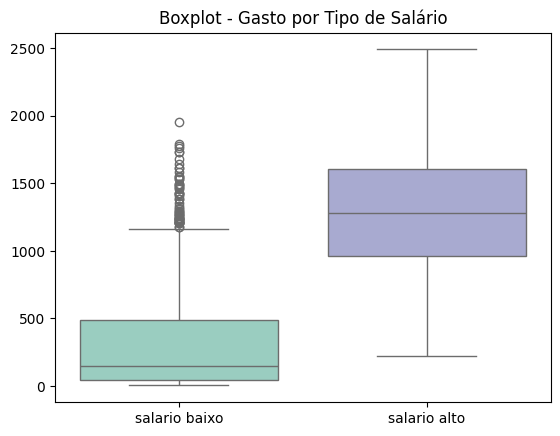

In [327]:
# Pessoas que têm um maior salário gastam mais?

q3 = dados_2['Renda Mensal'].quantile(0.75)

dados_2['faixa_salarial'] = dados_2['Renda Mensal'].apply(lambda x: 'salario alto' if x > q3 else 'salario baixo')

dados_2['faixa_salarial'].value_counts()

colors = "#92d5c4", "#a1a4d7"

sn.boxplot(x = 'faixa_salarial', y = 'Gastos na Plataforma', data = dados_2, linewidth=1, palette = colors)
plt.ylabel('')
plt.xlabel('')
plt.title('Boxplot - Gasto por Tipo de Salário')

plt.show()

In [ ]:
# Faixa salarial e gastos na plataforma

dados_2.groupby('faixa_salarial')['Gastos na Plataforma'].agg(media= 'mean', mediana='median', desvio_padrao='std' ).round(2)

,media,mediana,desvio_padrao
faixa_salarial,,,
salario alto,1294.71,1281.0,436.83
salario baixo,319.49,147.0,375.18


/var/folders/x8/b89wn3vx0jd4cmv6h5_4cv6m0000gn/T/ipykernel_83269/2610659228.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.boxplot(x = 'nivel_educacional', y = 'Gastos na Plataforma', data = dados_2, linewidth=1, palette = colors)


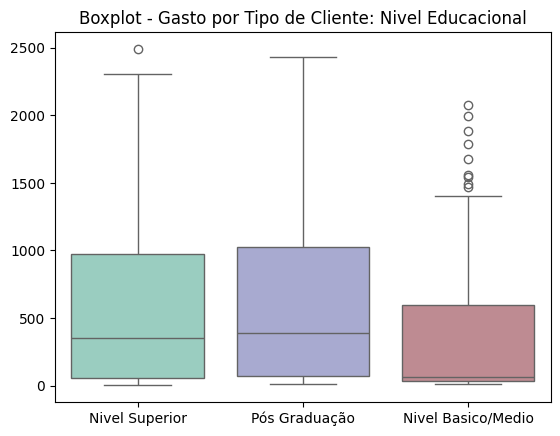

In [360]:
# Pessoas com maior grau de instrução gastam mais na plataforma? 

def nivel_educacional(educacao):
    if educacao == 'Graduation':
        return 'Nivel Superior'
    if educacao in ['PhD', 'Master']:
        return 'Pós Graduação'
    elif educacao  in ['2n Cycle', 'Basic']:
        return 'Nivel Basico/Medio'
    else:
        return 'Outros'

dados_2['nivel_educacional'] = dados_2['Nivel Educacional'].apply(nivel_educacional)


colors = "#92d5c4", "#a1a4d7", "#c6838c"

sn.boxplot(x = 'nivel_educacional', y = 'Gastos na Plataforma', data = dados_2, linewidth=1, palette = colors)
plt.ylabel('')
plt.xlabel('')
plt.title('Boxplot - Gasto por Tipo de Cliente: Nivel Educacional')

plt.show()

In [374]:
# Formacao e gastos na plataforma

dados_2.groupby('nivel_educacional')['Gastos na Plataforma'].agg(media= 'mean', mediana='median', desvio_padrao='std' ).round(2)

,media,mediana,desvio_padrao
nivel_educacional,,,
Nivel Basico/Medio,364.42,66.0,480.05
Nivel Superior,575.15,351.0,571.23
Pós Graduação,608.25,392.0,596.74


/var/folders/x8/b89wn3vx0jd4cmv6h5_4cv6m0000gn/T/ipykernel_83269/295810777.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.boxplot(x = 'faixa_etaria', y = 'Gastos na Plataforma', data = dados_2, linewidth=1, palette = colors)


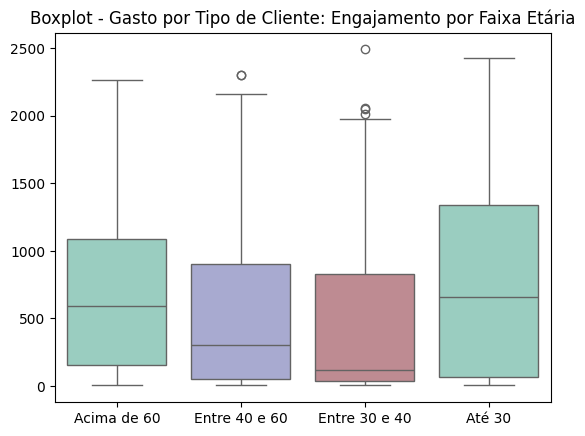

In [378]:
def faixa_etaria(idade):
    if idade <= 30:
        return 'Até 30'
    elif 30 <= idade <= 40:
        return 'Entre 30 e 40'
    elif 40 <= idade <= 60:
        return 'Entre 40 e 60'
    else:
        return 'Acima de 60'

dados_2['faixa_etaria'] = dados_2['Idade'].apply(faixa_etaria)

colors = "#92d5c4", "#a1a4d7", "#c6838c"

sn.boxplot(x = 'faixa_etaria', y = 'Gastos na Plataforma', data = dados_2, linewidth=1, palette = colors)
plt.ylabel('')
plt.xlabel('')
plt.title('Boxplot - Gasto por Tipo de Cliente: Engajamento por Faixa Etária')

plt.show()

In [379]:
#  Faixa Etária  e gastos na plataforma

dados_2.groupby('faixa_etaria')['Gastos na Plataforma'].agg(media= 'mean', mediana='median', desvio_padrao='std' ).round(2)

,media,mediana,desvio_padrao
faixa_etaria,,,
Acima de 60,680.97,592.5,565.19
Até 30,750.72,661.5,692.25
Entre 30 e 40,473.96,120.0,605.19
Entre 40 e 60,526.53,303.0,556.21


/var/folders/x8/b89wn3vx0jd4cmv6h5_4cv6m0000gn/T/ipykernel_83269/1326190334.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.boxplot(x = 'sem_acessar', y = 'Gastos na Plataforma', data = dados_2, linewidth=1, palette = colors)


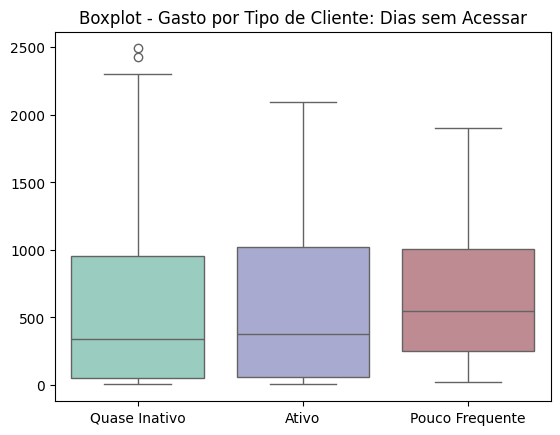

In [371]:
def sem_acessar(dias):
    if dias <= 7:
        return 'Ativo'
    elif 8 >= dias <= 30:
        return 'Pouco Frequente'
    else:
        return 'Quase Inativo'

dados_2['sem_acessar'] = dados_2['Dias sem Acessar'].apply(sem_acessar)

colors = "#92d5c4", "#a1a4d7", "#c6838c"

sn.boxplot(x = 'sem_acessar', y = 'Gastos na Plataforma', data = dados_2, linewidth=1, palette = colors)
plt.ylabel('')
plt.xlabel('')
plt.title('Boxplot - Gasto por Tipo de Cliente: Dias sem Acessar')
plt.show()

In [377]:
#  Dias sem acessar e gastos na plataforma

dados_2.groupby('sem_acessar')['Gastos na Plataforma'].agg(media= 'mean', mediana='median', desvio_padrao='std' ).round(2)


,media,mediana,desvio_padrao
sem_acessar,,,
Ativo,574.55,376.5,562.67
Pouco Frequente,682.25,548.0,575.33
Quase Inativo,560.98,340.5,577.29


<font color = #c6a9ac> 

Agora vamos aos principais insights dessa segunda parte da análise. 

**1. Engajamento no site:** Pelo que percebemos o perfil 'Pouco Engajado' ou seja, que acessa o site de 1 a 3 vezes por mês apenas tem a maior mediana de gastos na plataforma, seguido do perfil 'Inativo'. Isso indica que não necessariamente acessar muito o site faz um cliente gastar muito, às vezes quem acessa muito o site pode estar procurando por promoções apenas, e aquele perfil que vai direto à plataforma comprar se preocupe menos em economizar. Também há a hipótese de que o cliente Frequente faz pequenas compras mas de modo mais rotineiro, enquanto o cliente Pouco Engajado faz poucas compras mas quando o faz gasta muito. 

**2. Estado Civil:** Olhando as métricas não parece existir um impacto expressivo entre ser casado e solteira nos gastos na plataforma, os solteiros gastam ligeriamente um pouco mais, mas nada muito relevante. 

**3. Filhos:** Aqui sim há um impacto relevante, pessoas sem filhos gastam mais. 

**4. Faixa Salarial:** Aqui também há impacto expressivo, já havíamos detectado essa relação na análise de correlação, pessoas com salarios considerados altos por essa análise gastam mais (aqui considerando o quartil 75, ou seja, se colocarmos os dados em ordem crescente os 25% maiores salários serão considerados 'salario alto')

**5. Nível Educacional:** Essa variável pode refletir a faixa salarial e ter um comportamento parecido. De fato, clientes com pós graduação ganham mais, seguidos por ensino superior. 

**6. Faixa Etária:** Apesar da base de dados ser composta principalmente pelo grupo etário entre 40 e 60 anos, quem gasta mais tem até 30 anos, seguido pelo grupo 'Acima de 60 anos' 

**7. Dias sem acessar:** Essa variável tem comportamento parecido com 'engajamento no site', o grupo mais ativo não é o que gasta mais, o 'pouco frequente' gasta mais (aqueles que não acessam a plataforma faz pelo menos uma semana mas menos que um mês).  


**A partir dessas análises, podemos inferir alguns aspectos do perfil mais frequente dos clientes dessa amostra:**


<font color = #d45e80> **Perfil que gasta mais: "São clientes com atê 30 anos, sem filhos, com pós graduação, renda alta (maior que 5.600 reais), pouco frequentes na plataforma."**


<font color = #d45e80> **Perfil que gasta menos: "São os clientes entre 30 e 40 anos, com filhos, nível de formação básico ou médio, salário baixo (menor que 5.600 reais), bastante frequentes na plataforma."**